Import necessary modules.

In [208]:
# Model and data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [209]:
# Feature engineering / preprocessing

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

Data.

In [210]:
# Import data

health_data = pd.read_csv("health_data.csv")
print(health_data.head())
print(health_data.info())

    Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2  13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3  11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4   8.0  0.0       0.0        1.0  29.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      3.0       5.0   
1           0.0     1.0      0.0                0.0      3.0       0.0   
2           1.0     1.0      1.0                0.0      1.0       0.0   
3           1.0     1.0      1.0                0.0      3.0       0.0   
4           1.0     1.0      1.0                0.0      2.0       0.0   

   PhysHlth  DiffWalk  Diabetes  Hypertension  Stroke  
0      30.0       0.0       0.0           1.0     0.0  
1   

In [211]:
# Quick analysis

print("Shape: {shape}".format(shape=health_data.shape))
print("Columns: {columns}".format(columns=health_data.columns))
print(health_data.dtypes)

Shape: (70692, 18)
Columns: Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke'],
      dtype='object')
Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Diabetes                float64
Hypertension            float64
Stroke                  float64
dtype: object


In [212]:
# No categorical variables

print(health_data.isnull().values.any())
print(health_data.duplicated())


False
0        False
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Length: 70692, dtype: bool


Analysis.

Non boolean features (graphs 1-5) & boolean features (graphs 6-15):


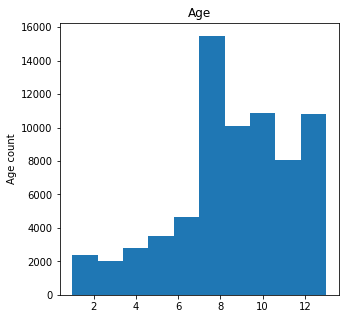

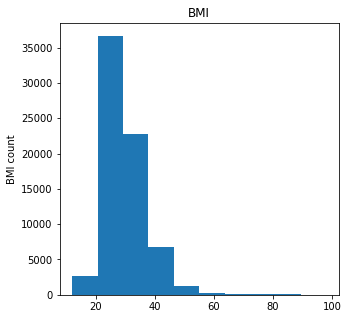

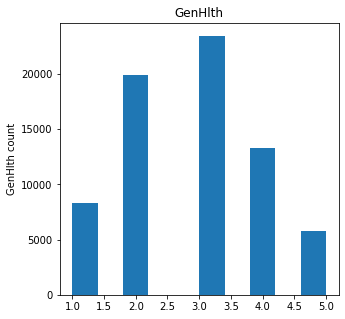

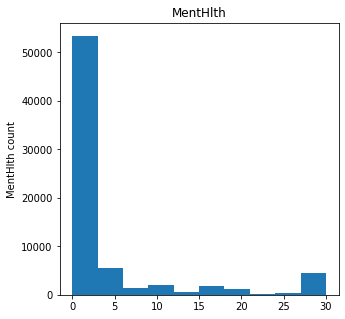

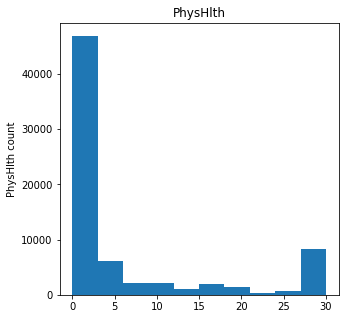

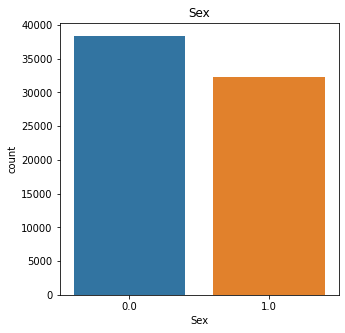

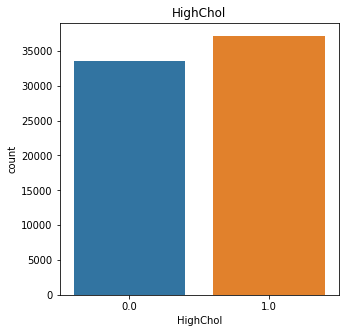

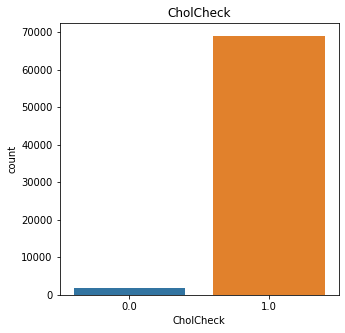

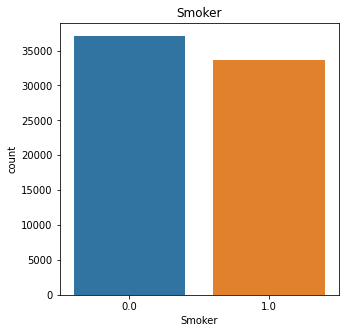

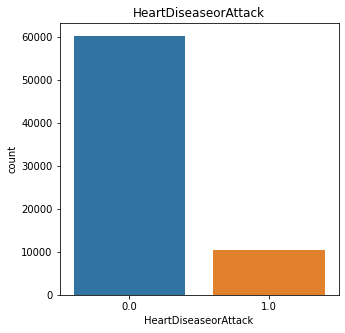

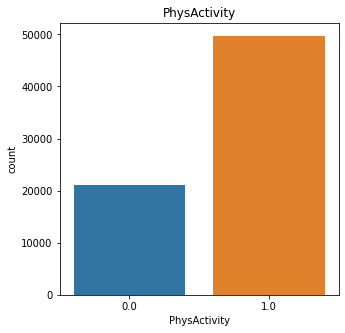

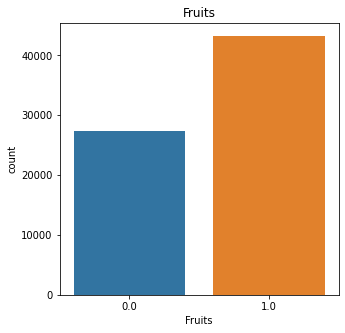

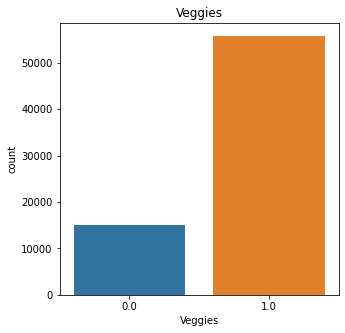

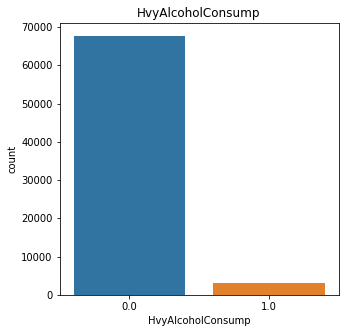

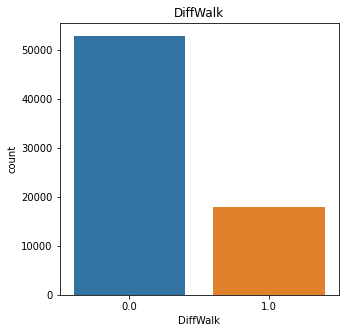

In [213]:
# EDA

non_bool_features = ["Age", "BMI", "GenHlth", "MentHlth", "PhysHlth"]

print("Non boolean features (graphs 1-5) & boolean features (graphs 6-15):")
for column in non_bool_features:
    plt.figure(figsize=(5,5))
    plt.hist(health_data[column])
    plt.ylabel("{column} count".format(column=column))
    plt.title(column)

bool_features = ["Sex", "HighChol", "CholCheck", "Smoker", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "DiffWalk"]
# Not including test features: Diabetes, Hypertension, Stroke

for column in bool_features:
    plt.figure(figsize=(5,5))
    sns.countplot(x=health_data[column])
    plt.title(column)

Text(0.5, 1.0, 'Correlation Heatmap')

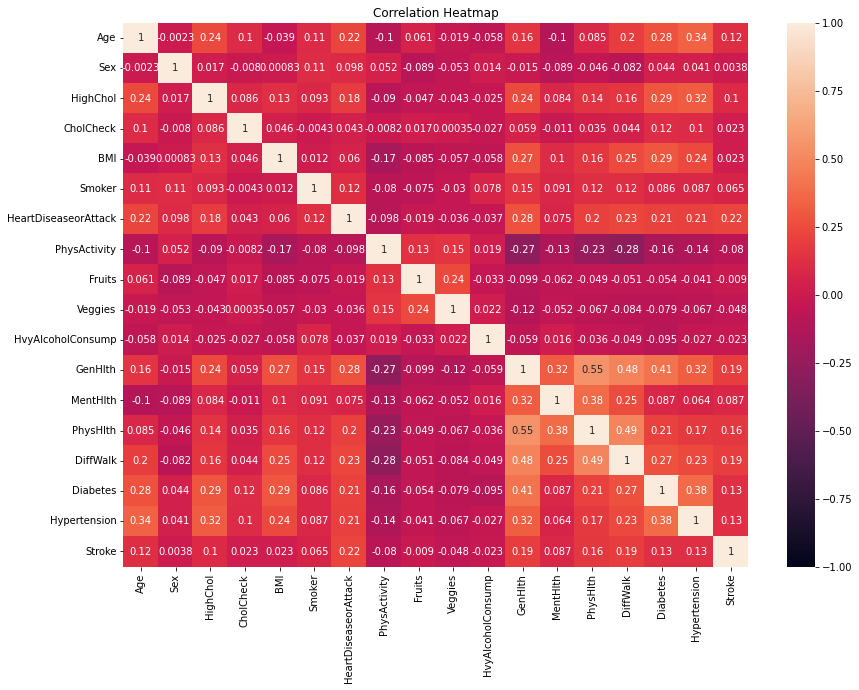

In [214]:
plt.figure(figsize=(14,10))
sns.heatmap(health_data.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Correlation Heatmap")

It can be seen that: age, high colesterol, BMI, heart disease/attack, general & physical health and difficulty walking correlate the most to diabetes, hypertension and stroke.

We will use these features for the predictions.

In [215]:
health_features = ["Age", "HighChol", "BMI", "HeartDiseaseorAttack", "GenHlth", "PhysHlth", "DiffWalk"]

X = health_data[health_features]
predicting_variables = ["Diabetes", "Hypertension", "Stroke"]

for i in predicting_variables:
    y = health_data[i]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    health_model = GradientBoostingClassifier(random_state=1)
    health_model.fit(X_train, y_train)

    print("mae: score ratio for " + i.lower())

    predicted = health_model.predict(X_test)
    print(str(mean_absolute_error(y_test, predicted)) + ": " + str(health_model.score(X_test, y_test)))



mae: score ratio for diabetes
0.2622533418204965: 0.7377466581795035
mae: score ratio for hypertension
0.2626069736190678: 0.7373930263809322


It can be seen that predicting a stroke from this dataset & model has much greater accuracy than predicting diabetes or hypertension.

Improving the model.

In [ ]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = GradientBoostingClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    return(mae)

# for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(my_mae)

# So max_leaf_nodes = 5 is the optimal amount of leaves
max_leaf_nodes = 5

def get_mae(max_leaf_nodes, learning_rate, X_train, X_test, y_train, y_test):
    model = GradientBoostingClassifier(max_leaf_nodes=max_leaf_nodes, learning_rate=learning_rate, random_state=0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    return(mae)

# for learning_rate in [0.1, 1.0, 2.0, 5.0]:
    my_mae = get_mae(max_leaf_nodes, learning_rate, X_train, X_test, y_train, y_test)
    print(my_mae)

# So default learning rate was optimal
learning_rate = 0.1

def get_mae(max_leaf_nodes, learning_rate, n_estimators, X_train, X_test, y_train, y_test):
    model = GradientBoostingClassifier(max_leaf_nodes=max_leaf_nodes, n_estimators=n_estimators, learning_rate=learning_rate, random_state=0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    return(mae)

for n_estimators in [25, 50, 100, 200]:
    my_mae = get_mae(max_leaf_nodes, learning_rate, n_estimators, X_train, X_test, y_train, y_test)
    print(my_mae)

# So n_estimators = 50 is optimal

0.06513897729683853
0.06513897729683853
0.06528043001626706
0.06535115637598132


Readjusting the model.

In [ ]:
for i in predicting_variables:
    y = health_data[i]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    health_model = GradientBoostingClassifier(max_leaf_nodes=5, learning_rate=0.1, n_estimators=50, random_state=1)
    health_model.fit(X_train, y_train)

    print("mae: score ratio for " + i.lower())

    predicted = health_model.predict(X_test)
    print(str(mean_absolute_error(y_test, predicted)) + ": " + str(health_model.score(X_test, y_test)))

mae: score ratio for diabetes
0.26529457528820993: 0.7347054247117901
mae: score ratio for hypertension
0.2638800480939246: 0.7361199519060754
mae: score ratio for stroke
0.06513897729683853: 0.9348610227031615


After comparing, it can be seen that the stroke prediction became more accurate, however the diabetes and hypertension accuracy decreased.